# 28. Logistic Regression (Practical) (Binary Classification)

- **Logistic Regression** is one of the most popular Machine Learning algorithms, which comes under the **Supervised Learning Technique**
- It is used for predicting the **categorical dependent variables** using a given set of independent variables
- Therefore, the coutcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or false,etc. but instead of giving the exact value as 0 and 1, **it gives the probablisitic values which lie b/w 0 and 1.**
- The data should be linearly separable

### Types of Logistic Regression

On the basis of **categories**, Logistic Regression can be classified into three types:
1) **Binomial:** In binomial logistic regression, there can be two possible types of the dependent variables, such as 0 or 1, Pass or Fail etc.
2) **Multinomial:** In multinomial logistic regression, there can be 3 or more possible **unordered** types of the dependent variables, such as cat, dog or sheep
3) **Ordinal:** In ordinal logistic regression, there can be 5 or more possible **ordered** types of dependent varaibles, such as low, medium or high

- In logistic regression, the prediction is done through **Sigmoid algorithm**

<img src="Images/sigmoid-algo.jpg"  style="width: 400px;"/>

### Logistic Regression Equation

The logistic regression equation can be obtained from the Linear Regress Model. The mathematical steps to get Logistic Regression equation are given below:

$$
y = \frac{1}{1 + e^{-x}}
$$

where:
- y = dependent variable (Bought Product)
- x = independent variable (Salary)  (x= m1x1 + m2x2 + b)
- e = Euler's constant-2.71828


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv(r'Data/Social_Network_Ads.csv')
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [9]:
# For now, we want to see effect of age on purchase and ignore EstimatedSalary, so we will drop this column
dataset.drop(columns=['EstimatedSalary'], inplace=True)
dataset.head(3)

,Age,Purchased
0,19,0
1,35,0
2,26,0


**To see if our data follows Logistic Regression or Not**

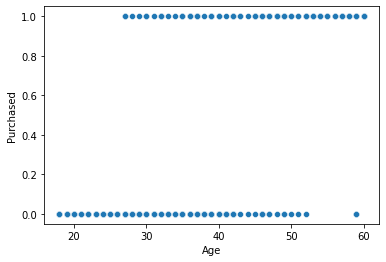

In [11]:
sns.scatterplot(x="Age", y="Purchased", data=dataset)
plt.show()

Our data follows logistic regression

1) Next we will split the data into dependent (x) and independent (y) variables

In [13]:
# Note that data should be in 2 dimension
x = dataset[['Age']]
y = dataset[['Purchased']]

2. Now we will split the data into train and test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

3. Apply Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

5. Check the accuracy of model

In [19]:
lr.score(x_test, y_test)*100

91.25

6. Perform predictions on built model

In [20]:
lr.predict([[40]])

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

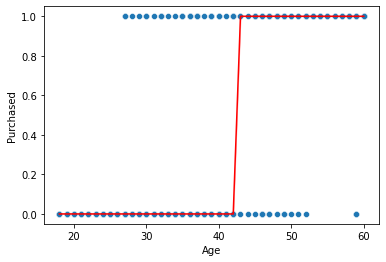

In [22]:
sns.scatterplot(x="Age", y="Purchased", data=dataset)
sns.lineplot(x='Age', y=lr.predict(x), data=dataset, color='red')
plt.show()